## Importing Libraries 


In [22]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.metrics import classification_report , accuracy_score
import warnings
warnings.filterwarnings('ignore')

### <font color='yellow'>Data Collection & Processing </font>

In [23]:
#Load the Data from CSV File to Pandas DataFrame
titanic_data = pd.read_csv('E:\\data science\\project\\Titanic Survival\\train.csv')


In [24]:
# Printing The First 5 Rows of the DataFrame
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# Number Of Rows and Columns 
titanic_data.shape

(891, 12)

In [26]:
# Getting Information About the DataFrame 
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
# Checking The Missing Values in Columns  
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### <font color='yellow'> Handling the Missing Values</font>

In [28]:
# Drop the Cabin Column From The DataFrame 
titanic_data = titanic_data.drop(['Cabin'] , axis=1)

In [29]:
# Fill The Missing Values in "Age" Columns with the Mean of Age 
titanic_data['Age'].fillna(titanic_data['Age'].mean() ,inplace = True)

In [30]:
# Fill The Missing Values in "Embarked" Columns with the Mode of Embarked 
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0] ,inplace = True)

In [31]:
# Again Checking the Missing the in DataFrame
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### <font color='Yellow'>Data Analysis</font>

In [32]:
# Getting the Satistical measures about the data 
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### <font color='Yellow'>Data Visualization</font>

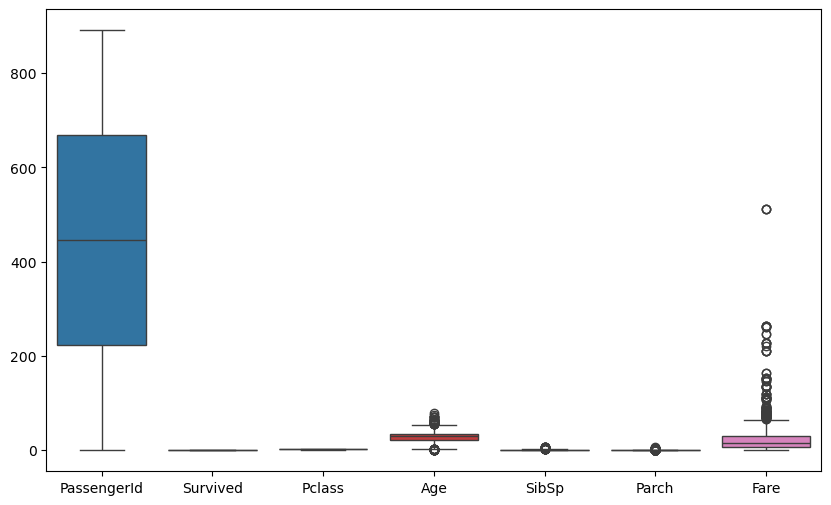

In [65]:
## Checking the Outliers 
plt.figure(figsize=(10,6))
sns.boxplot(data=titanic_data)

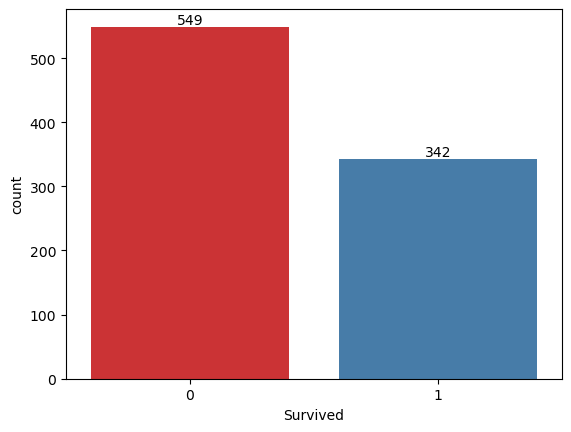

In [34]:
# Plot Count plot for Number of Survived 

sns.countplot(x='Survived',data = titanic_data ,palette='Set1')
for Gender, count in titanic_data['Survived'].value_counts().items():
    plt.text(x=Gender, y=count, s=f'{count}', ha='center', va='bottom')
   
plt.show()

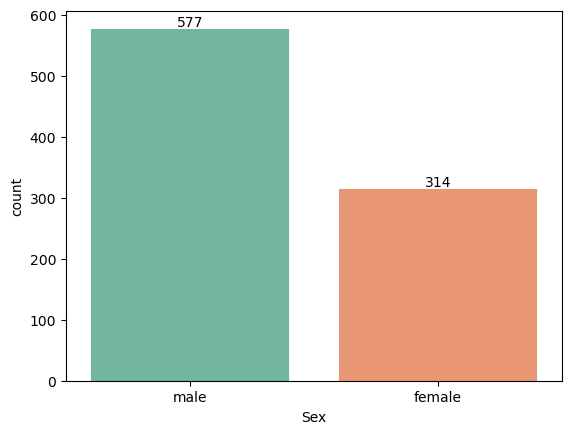

In [35]:
# Plot Count plot for Number of Gender 

sns.countplot(x='Sex',data = titanic_data ,palette='Set2')
for Gender, count in titanic_data['Sex'].value_counts().items():
    plt.text(x=Gender, y=count, s=f'{count}', ha='center', va='bottom')

plt.show()


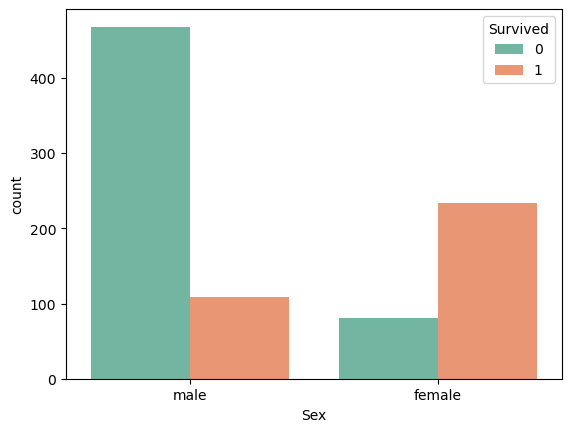

In [36]:
# Plot Count plot for Number of Gender 

sns.countplot(x='Sex',hue='Survived',data = titanic_data ,palette='Set2')
plt.show()

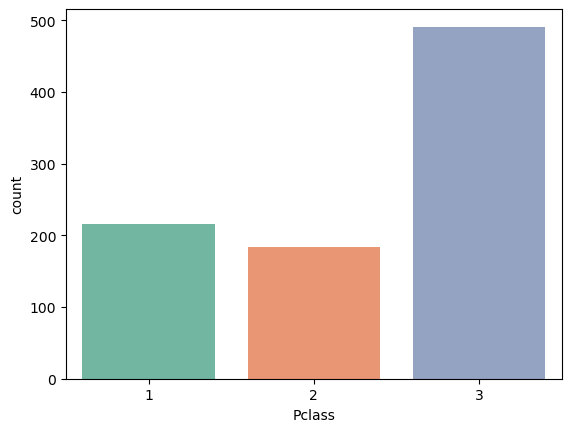

In [37]:
# plot the Count plot for 'Pclass' COlumns

sns.countplot(x='Pclass',data = titanic_data ,palette='Set2')
plt.show()

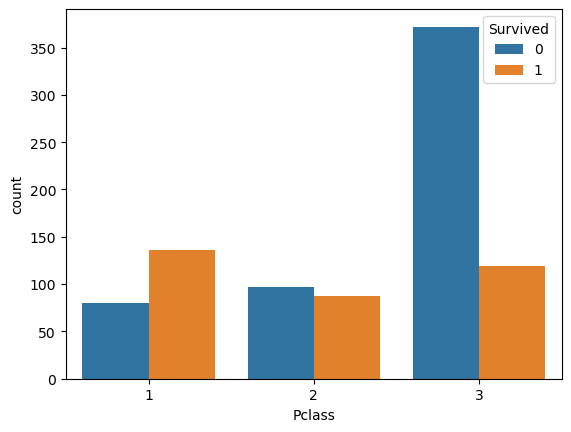

In [38]:
# plot a Count of Survived & Not Survived on the basis of Pclass
sns.countplot(x='Pclass',hue='Survived',data=titanic_data)


In [39]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


 ### <font color='Yellow'>Seperate the Feature and Columns</font>

In [40]:
input = titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [41]:
input.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [42]:
## Encoding with OneHotEncoder
from sklearn.preprocessing import  OneHotEncoder 

encoder = OneHotEncoder(drop='first',sparse_output = False)
encoded=encoder.fit_transform(input[['Sex','Embarked']])

In [43]:
X = np.hstack((input[['Pclass','Age','SibSp','Parch','Fare']].values,encoded))

 ### <font color='Yellow'>Split the data into test and train data</font>

In [44]:
from sklearn.model_selection  import cross_val_score , train_test_split 

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 42 )

In [46]:
X_train.shape

(623, 8)

 ### <font color='Yellow'> Train Model and predict</font>

####  <font color='green'>Logistic Regression </font>

In [47]:
from sklearn.linear_model import LogisticRegression 

In [66]:
#train the model with Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
predict1 = model1.predict(X_test)
accuracy1 = accuracy_score(predict1,Y_test)
print('Accuracy Score of Logistic Regression : ',accuracy1)

Accuracy Score of Logistic Regression :  0.8097014925373134


In [73]:
predict = model1.predict(X_test)
predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [76]:
[[Y_test]]

[[709    1
  439    0
  840    0
  720    1
  39     1
        ..
  821    1
  633    0
  456    0
  500    0
  430    1
  Name: Survived, Length: 268, dtype: int64]]

#### <font color='green'>Decision Tree </font>

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,Y_train)
predict2 = model2.predict(X_test)
accuracy2 = accuracy_score(predict2,Y_test)
print('Accuracy Score of Decision Tree : ',accuracy2)

Accuracy Score of Decision Tree :  0.7425373134328358


### <font color='green'>Random Forest </font>

In [53]:
from sklearn.ensemble import RandomForestClassifier 

In [68]:
model3 = RandomForestClassifier()
model3.fit(X_train,Y_train)
predict3=model3.predict(X_test)
accuracy3 = accuracy_score(predict3,Y_test)
print('Accuracy Score of Random Forest : ',accuracy3)

Accuracy Score of Random Forest :  0.7873134328358209


###  <font color='green'>K Nearest Neighbors </font>

In [56]:
from sklearn.neighbors import KNeighborsClassifier 

In [69]:
model4 = KNeighborsClassifier()
model4.fit(X_train, Y_train)
predict4 = model4.predict(X_test)
accuracy4 = accuracy_score(predict4,Y_test)
print('Accuracy Score of K Nearest Neighbor : ',accuracy4)

Accuracy Score of K Nearest Neighbor :  0.6902985074626866


### <font color='green'>Support Vector Machine</font>

In [70]:
from sklearn.svm import SVC
model5 =SVC()
model5.fit(X_train,Y_train)
predict5 = model5.predict(X_test)
accuracy5 = accuracy_score(predict5,Y_test)
print('Accuracy Score of Support Vector Machine : ',accuracy5)

Accuracy Score of Support Vector Machine :  0.6604477611940298


### <font color='green'>Naive Bayes</font>

In [61]:
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(X_train ,Y_train)

GaussianNB()

In [62]:
predict6 = model6.predict(X_test)
accuracy6 = accuracy_score(predict6,Y_test)
print('Accuracy Score of Naive Bayes : ',accuracy6)

Accuracy Score of Naive Bayes :  0.7947761194029851


##  <font color='red'>   Classification Report </font>

In [71]:


def generate_classification_report(model_name ,Y_test , predict):
    report = classification_report(Y_test , predict)
    print(f'Classifiaction report for {model_name}: \n {report} \n')

generate_classification_report(model1,Y_test , predict1)
generate_classification_report(model2,Y_test , predict2)
generate_classification_report(model3,Y_test , predict3)
generate_classification_report(model5,Y_test , predict5)
generate_classification_report(model4,Y_test , predict4)
generate_classification_report(model6,Y_test , predict6)

Classifiaction report for LogisticRegression(): 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268
 

Classifiaction report for DecisionTreeClassifier(): 
               precision    recall  f1-score   support

           0       0.77      0.80      0.78       157
           1       0.70      0.67      0.68       111

    accuracy                           0.74       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268
 

Classifiaction report for RandomForestClassifier(): 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       157
           1       0.76      0.71      0.73       111

    accuracy        

###   <font color='yellow'>So the Accuracy of Logistic Regression is "81 % "   and this the best accuracy score from all algorithms ,  </font>

###  <font color='Yellow'>That's Why I am using Logistic Regression Instead of Other algorithms for ML Modeling  </font>

In [64]:
## Now Downloading this Model 
import joblib 
joblib.dump(model1 ,'logistic_Regression_Model.pkl')

['logistic_Regression_Model.pkl']